In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize, fsolve

In [2]:
#De data, intensiteit I(a.u.) en afstand x(mm) wordt eerst ingeladen.
#De pandas library bevat eenvoudige commando's om data in te lezen.

import pandas as pd

#De data is een text bestand, waarbij de kolommen gescheiden zijn door zelf ingevoerde tabs.
Data = pd.read_csv('data_opdracht_1.txt', sep="\t", header = 0)

Data.columns = ["a", "b"]
tijd = Data.a
V = Data.b

t_opladen = []
V_opladen = []

t_ontladen = []
V_ontladen = []


for i in range(len(tijd)):
    if tijd[i] < 5.00002 * 10**(-4):
        t_opladen.append(tijd[i])
        V_opladen.append(V[i])

for i in range(len(tijd)):
    if tijd[i] > 5.00001 * 10**(-4):
        t_ontladen.append(tijd[i])
        V_ontladen.append(V[i])

In [3]:
R = 10
C = 10*10**(-6)

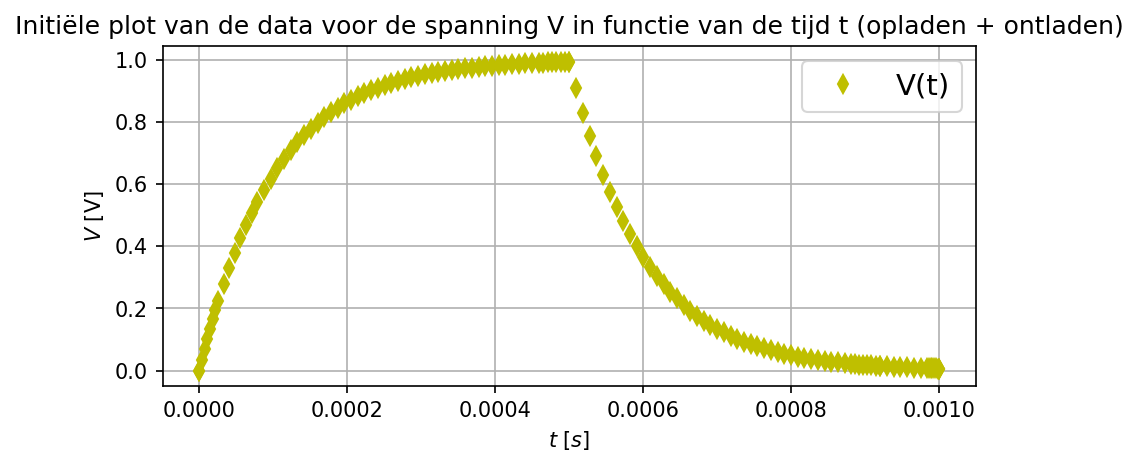

In [4]:
#Vervolgens wordt er een plot gemaakt van de data. Dit geeft meer inzicht dan de tabellen met waarden in.

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(7, 3))


ax.set_title('Initiële plot van de data voor de spanning V in functie van de tijd t (opladen + ontladen)')
ax.grid(True, which = 'both') #Voegt rijen en kolommen toe, zodat de datapunten beter vergeleken en afgelezen kunnen worden.
plt.errorbar(tijd, V, label = 'V(t)', fmt = 'd ', c='y', capsize=3, elinewidth=0.5, capthick=0.5)
plt.ylabel('$V$ [V]', size=10)
plt.xlabel('$t$ $[s]$', size=10)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)

fig.savefig('Initiële_plot_van_de_data_voor_de_spanning_V_in_functie_van_de_tijd_t_RC.png')



plt.show()

In [5]:
# Opladen

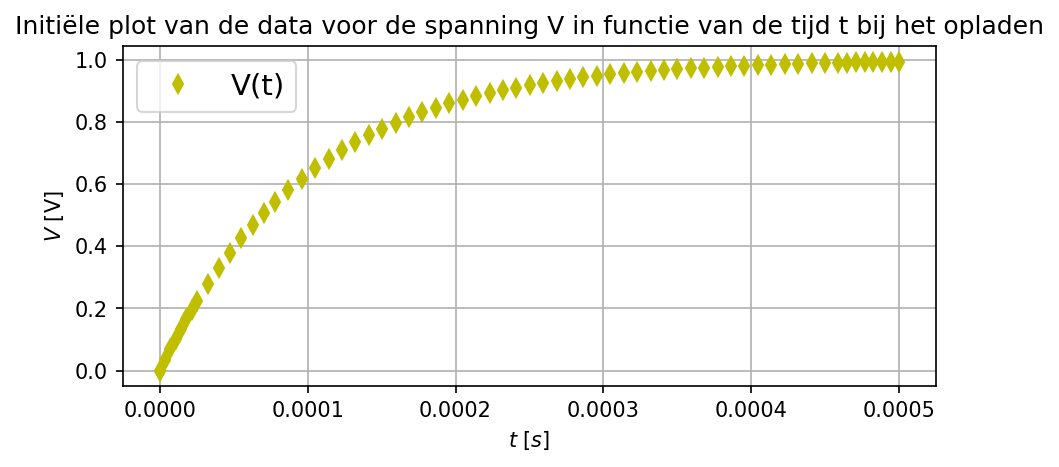

In [6]:
#Vervolgens wordt er een plot gemaakt van de data. Dit geeft meer inzicht dan de tabellen met waarden in.

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(7, 3))


ax.set_title('Initiële plot van de data voor de spanning V in functie van de tijd t bij het opladen')
ax.grid(True, which = 'both') #Voegt rijen en kolommen toe, zodat de datapunten beter vergeleken en afgelezen kunnen worden.
plt.errorbar(t_opladen, V_opladen, label = 'V(t)', fmt = 'd ', c='y', capsize=3, elinewidth=0.5, capthick=0.5)
plt.ylabel('$V$ [V]', size=10)
plt.xlabel('$t$ $[s]$', size=10)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)


plt.show()

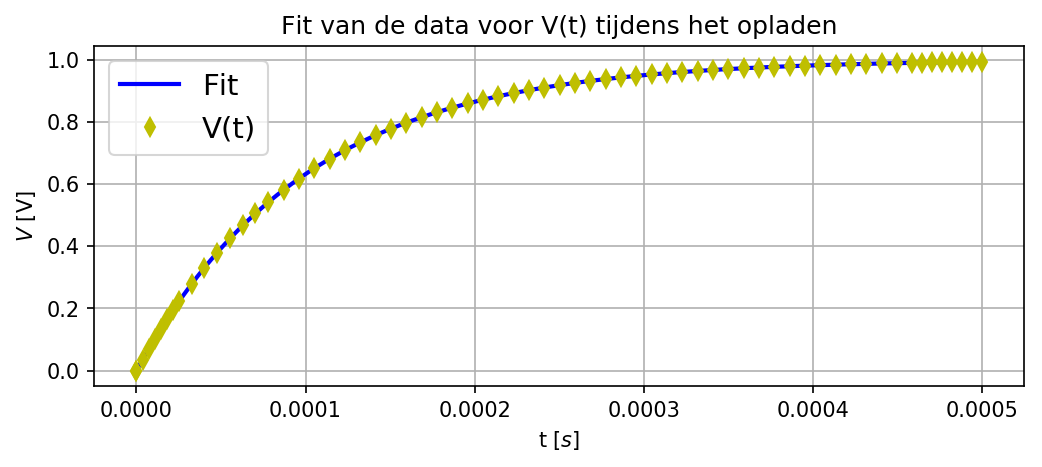

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(8, 3))

#We willen nu een goede benadering vinden van de gevonden data via een Lorentzfunctie die wordt gedefiniëerd als

def spanning(t, tau):
    """Spanning"""
    return 1-np.exp(-t/tau)



#Vervolgens wordt er een initiële fit gemaakt van de data door waarden voor de parameters te gokken, 
#zodat de fit goed past op de data. 
#Na enig puzzelwerk, werden de volgende waarden voor de paramters gekozen die een goede fit lijken te bekomen:

def plot(ax, x, y):
    """Plotten functie Amplitude"""
    ax.plot(x, y, color = 'blue', linewidth=2, label = 'Fit')

tau = R * C

begin = [tau]

z = np.linspace(start=t_opladen[0], stop= t_opladen[len(t_opladen)-1], num=5000)

plt.errorbar(t_opladen, V_opladen, label = 'V(t)', fmt = 'd ', c='y', capsize=3, elinewidth=0.5, capthick=0.5)

plot(ax, z, spanning(z,begin[0]))
ax.grid(True, which = 'both')



ax.set_title('Fit van de data voor V(t) tijdens het opladen')
ax.grid(True, which = 'both') #Voegt rijen en kolommen toe, zodat de datapunten beter vergeleken en afgelezen kunnen worden.
plt.ylabel('$V$ [V]', size=10)
plt.xlabel('t $[s]$', size=10)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)


plt.show()


In [8]:
from scipy.optimize import curve_fit

init_vals = [begin[0]]
best_vals, covar = curve_fit(spanning,t_opladen, V_opladen, p0=init_vals)
print('best_vals: {}'.format(best_vals))

best_vals: [0.0001]


In [9]:
from scipy.optimize import fsolve

def findIntersection(fun1,fun2,x0):
    return fsolve(lambda x : fun1(x) - fun2(x),x0)

z = np.linspace(start=t_opladen[0], stop= t_opladen[len(t_opladen)-1], num=5000)

def y(z):
    return 1-1/np.exp(1)

def g(z):
    return 1-np.exp(-z/best_vals[0])


snij1 = findIntersection(y,g,0)
snij1

array([0.0001])

In [10]:
# Ontladen

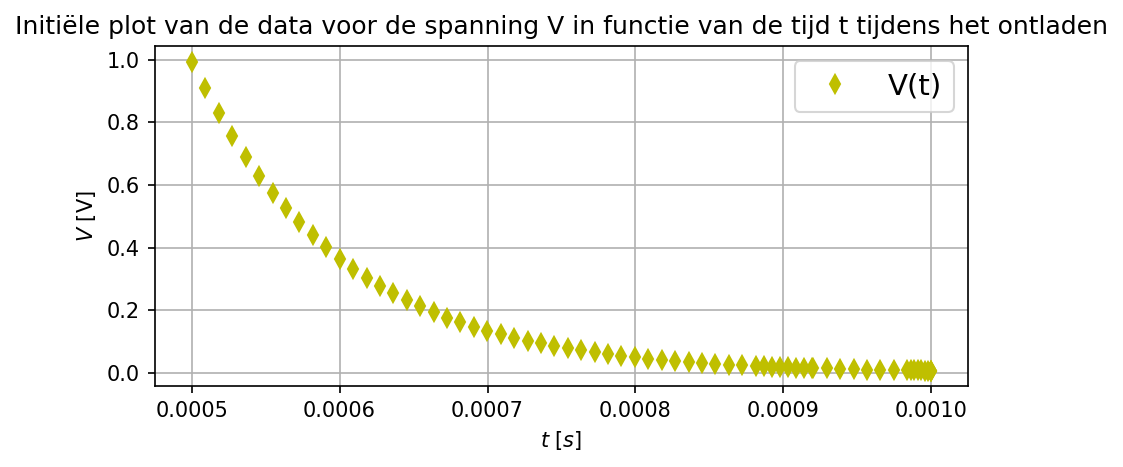

In [11]:
#Vervolgens wordt er een plot gemaakt van de data. Dit geeft meer inzicht dan de tabellen met waarden in.

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(7, 3))


ax.set_title('Initiële plot van de data voor de spanning V in functie van de tijd t tijdens het ontladen')
ax.grid(True, which = 'both') #Voegt rijen en kolommen toe, zodat de datapunten beter vergeleken en afgelezen kunnen worden.
plt.errorbar(t_ontladen, V_ontladen, label = 'V(t)', fmt = 'd ', c='y', capsize=3, elinewidth=0.5, capthick=0.5)
plt.ylabel('$V$ [V]', size=10)
plt.xlabel('$t$ $[s]$', size=10)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)


plt.show()

In [12]:
b = 500*10**(-6)
tau = R*C

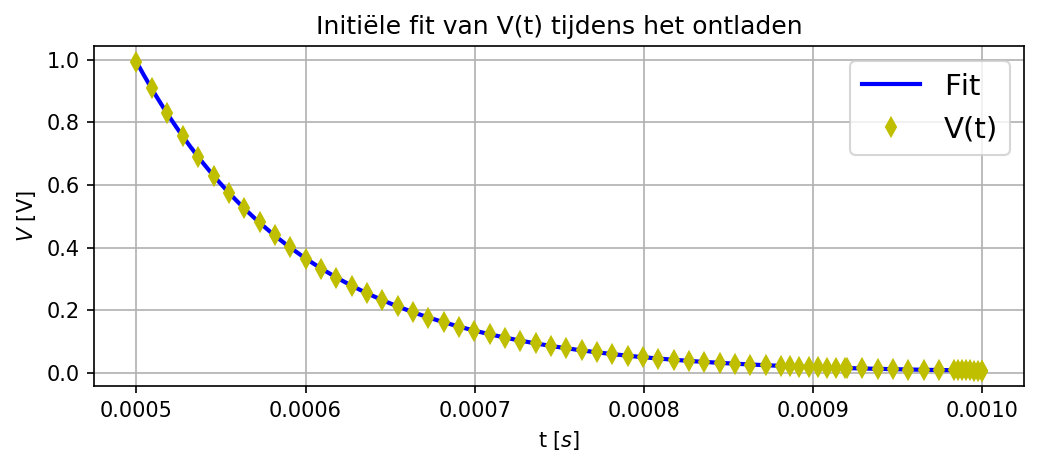

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(8, 3))

#We willen nu een goede benadering vinden van de gevonden data via een Lorentzfunctie die wordt gedefiniëerd als

def spanning(t, tau):
    """Spanning"""
    return np.exp(-(t-b)/tau)-np.exp(-t/tau)



#Vervolgens wordt er een initiële fit gemaakt van de data door waarden voor de parameters te gokken, 
#zodat de fit goed past op de data. 
#Na enig puzzelwerk, werden de volgende waarden voor de paramters gekozen die een goede fit lijken te bekomen:

def plot(ax, x, y):
    """Plotten functie Amplitude"""
    ax.plot(x, y, color = 'blue', linewidth=2, label = 'Fit')

tau = R * C

begin = [tau]

z = np.linspace(start=t_ontladen[0], stop= t_ontladen[len(t_ontladen)-1], num=5000)

plt.errorbar(t_ontladen, V_ontladen, label = 'V(t)', fmt = 'd ', c='y', capsize=3, elinewidth=0.5, capthick=0.5)

plot(ax, z, spanning(z,begin[0]))
ax.grid(True, which = 'both')



ax.set_title('Initiële fit van V(t) tijdens het ontladen')
ax.grid(True, which = 'both') #Voegt rijen en kolommen toe, zodat de datapunten beter vergeleken en afgelezen kunnen worden.
plt.ylabel('$V$ [V]', size=10)
plt.xlabel('t $[s]$', size=10)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)


plt.show()


In [14]:
from scipy.optimize import curve_fit

init_vals = [begin[0]]
best_vals, covar = curve_fit(spanning,t_ontladen, V_ontladen, p0=init_vals)
print('best_vals: {}'.format(best_vals))

best_vals: [9.99841756e-05]


In [15]:
from scipy.optimize import fsolve

def findIntersection(fun1,fun2,x0):
    return fsolve(lambda x : fun1(x) - fun2(x),x0)

z = np.linspace(start=t_ontladen[0], stop= t_ontladen[len(t_ontladen)-1], num=5000)

def y(z):
    return 1/np.exp(1)

def g(z):
    return np.exp(-(z-b)/best_vals[0])-np.exp(-z/best_vals[0])


snij2 = findIntersection(y,g,0)
snij2

array([0.00059931])

In [16]:
display(snij2 - b)

array([9.93087442e-05])